# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from scipy import stats
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__ The mean and standard deviation of the sample may be poor indicators of the population as the distribution is heavily skewed to the right.

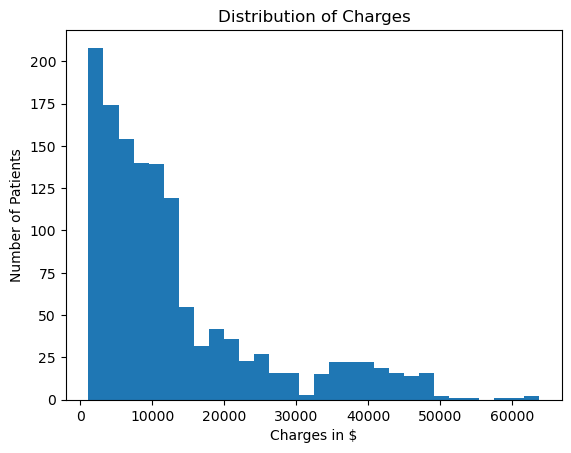

In [4]:
_ = plt.hist(medical['charges'], bins='auto')
_ = plt.xlabel('Charges in $')
_ = plt.ylabel('Number of Patients')
_ = plt.title('Distribution of Charges')

In [5]:
sample_mean = np.mean(medical['charges'])
sample_mean

13270.422265141257

In [6]:
sample_std = np.std(medical['charges'])
sample_std

12105.484975561605

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ Given our sample is quite large, we can accurately calculate a 95% confidence interval of the mean charge value.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ Given the administrator's concern, we would be calculating a one-sided confidence interval as we are only concerned with the mean being below $12,000

In [7]:
#Calculate t-statistic, margin of error, & 95% confidence interval
t_value = t.ppf(.95, 1338-1)
t_moe = t_value * (sample_std / np.sqrt(1338))
t_confidence_interval = (sample_mean - t_moe, float('inf'))

In [8]:
print("Population Mean Estimate:", sample_mean)
print("Margin of Error:", t_moe)
print("95% Confidence Interval of the Mean:", t_confidence_interval)

Population Mean Estimate: 13270.422265141257
Margin of Error: 544.7314053390934
95% Confidence Interval of the Mean: (12725.690859802164, inf)


__A:__ The administrator should not be concerned, as we can show with 95% confidence that the true population mean is above 12,725.69, above the threshold of 12,000.

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ The null hypothesis is that people with insurance and people without insurance are charged the same amount, while the alternative hypothesis is that people with insurance are charged a different amount than those without insurance. We are making the assumption that the variances pf the two groups are the same.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [9]:
#Calculate first sample's mean, standard deviation, & size
ins = medical.loc[medical['insuranceclaim'] ==1, 'charges']
x0 = ins.mean()
s0 = ins.std()
n0 = len(ins)

In [10]:
print(f'Mean of insurance charges: {x0}')
print(f'Std Dev of insurance charges: {s0}')
print(f'Sample size of insurance charges: {n0}')

Mean of insurance charges: 16423.928276537677
Std Dev of insurance charges: 14045.928418802127
Sample size of insurance charges: 783


In [11]:
#Calculate second sample's mean, standard deviation, & size
no_ins = medical.loc[medical['insuranceclaim'] ==0, 'charges']
x1 = no_ins.mean()
s1 = no_ins.std()
n1 = len(no_ins)

In [12]:
print(f'Mean of insurance charges: {x1}')
print(f'Std Dev of insurance charges: {s1}')
print(f'Sample size of insurance charges: {n1}')

Mean of insurance charges: 8821.421892306305
Std Dev of insurance charges: 6446.510126811736
Sample size of insurance charges: 555


In [13]:
#Calculate combined variance
sp = np.sqrt((((n0-1)* s0**2) + ((n1-1)* s1**2)) / (n0+n1-2))
sp

11520.034268775256

In [14]:
#Calculate t-statistic
t_stat = (x0-x1) / (sp * (np.sqrt((1/n0) + (1/n1))))
t_stat

11.893299030876715

In [15]:
#Calculate degrees of freedom
dof = n0 + n1 - 2
dof

1336

In [16]:
#Calculate p-value
p_value = t.sf(abs(t_stat), dof) * 2
p_value

4.4612302316205886e-31

In [17]:
#Calculate t-statistic, p-value, & degrees of freedom
p_value2 = stats.ttest_ind(ins, no_ins)
p_value2

TtestResult(statistic=11.893299030876712, pvalue=4.461230231620717e-31, df=1336.0)

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ There is no method for z-test in scipy.stats. This is likely because z-tests are less commonly used as they assume a known population standard deviation which is rarely the case.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test